# Environment setup and login in to Twitter

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [2]:
my_user = "dummyakt"
my_pass = getpass.getpass()


········


In [3]:
search_item="America"

In [4]:
PATH ="C:\Program Files\Drivers\chromedriver.exe"
driver = webdriver.Chrome()
driver.get("https://twitter.com/i/flow/login")
# driver.maximize_window()
sleep(3)

In [5]:
user_id=driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [6]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

# Scraping the Tweets

In [7]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [8]:
all_tweets = set()
tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [9]:
all_tweets = list(all_tweets)
all_tweets[0]

"No African claim to build America, only Indigenous Black Americans do \n\nStop dragging us into y'all BS"

# Cleaning the Tweets

In [10]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
pd.options.display.max_colwidth = 1000

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thavanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thavanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
stp_words=stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,"No African claim to build America, only Indigenous Black Americans do \n\nStop dragging us into y'all BS"
1,"Rural America is vanishing because it has voted against its economic interests for decades in order to pursue a backward social agenda. It voted itself out of the middle class, and now wants to blame others.\n\n #WhiteRuralRage"
2,"""Hi, my Mexicans! Yes, it is I, Donald Trump, waving at you. Now I know I called you rapists, drug dealers, and violent criminals who are poisoning the blood of America, but if you somehow get through this razor wire, vote for me! I can't lock your kids in cages anymore, ha ha!"""
3,"TRUMP: “Everyday, Joe Biden is giving aid and comfort to the foreign enemies of the United States. Biden’s conduct on our border is, by any definition, a conspiracy to overthrow the United States of America”"
4,He’s losing 15% of the Republican primary in America’s most Nazi state to a brown woman.


In [14]:
one_tweet=df.iloc[0]['tweets']
one_tweet

"No African claim to build America, only Indigenous Black Americans do \n\nStop dragging us into y'all BS"

In [15]:
from textblob import TextBlob
from wordcloud import WordCloud

In [16]:
def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#","",cleanTweet)
    cleanTweet = re.sub(r"\n"," ",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [17]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,"No African claim to build America, only Indigenous Black Americans do \n\nStop dragging us into y'all BS","No African claim build America, Indigenous Black Americans Stop dragging us y'all BS",-0.083333,0.216667,negative
1,"Rural America is vanishing because it has voted against its economic interests for decades in order to pursue a backward social agenda. It voted itself out of the middle class, and now wants to blame others.\n\n #WhiteRuralRage","Rural America vanishing voted economic interests decades order pursue backward social agenda. It voted middle class, wants blame others. WhiteRuralRage",0.086667,0.073333,positive
2,"""Hi, my Mexicans! Yes, it is I, Donald Trump, waving at you. Now I know I called you rapists, drug dealers, and violent criminals who are poisoning the blood of America, but if you somehow get through this razor wire, vote for me! I can't lock your kids in cages anymore, ha ha!""","""Hi, Mexicans! Yes, I, Donald Trump, waving you. Now I know I called rapists, drug dealers, violent criminals poisoning blood America, somehow get razor wire, vote me! I can't lock kids cages anymore, ha ha!""",-1.000000,1.000000,negative
3,"TRUMP: “Everyday, Joe Biden is giving aid and comfort to the foreign enemies of the United States. Biden’s conduct on our border is, by any definition, a conspiracy to overthrow the United States of America”","TRUMP: “Everyday, Joe Biden giving aid comfort foreign enemies United States. Biden’s conduct border is, definition, conspiracy overthrow United States America”",-0.162500,0.362500,negative
4,He’s losing 15% of the Republican primary in America’s most Nazi state to a brown woman.,He’s losing 15% Republican primary America’s Nazi state brown woman.,0.400000,0.500000,positive


# Analysis and Visualization

In [18]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,14
neutral,14
positive,26


In [19]:
#top 3 most positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
53,True nobody Hates America more then that sonofabitch !!!!!!!!!!!!!!!!!!!!!!!!,True nobody Hates America sonofabitch !!!!!!!!!!!!!!!!!!!!!!!!,1.000,0.65,positive
46,"Good morning Patriots,,God bless America..","Good morning Patriots,,God bless America..",0.700,0.60,positive
8,"More of this please, America!\n LFG","More please, America! LFG",0.625,0.50,positive


In [20]:
# top 3 most negative
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
2,"""Hi, my Mexicans! Yes, it is I, Donald Trump, waving at you. Now I know I called you rapists, drug dealers, and violent criminals who are poisoning the blood of America, but if you somehow get through this razor wire, vote for me! I can't lock your kids in cages anymore, ha ha!""","""Hi, Mexicans! Yes, I, Donald Trump, waving you. Now I know I called rapists, drug dealers, violent criminals poisoning blood America, somehow get razor wire, vote me! I can't lock kids cages anymore, ha ha!""",-1.000000,1.00,negative
18,And Nobody in America Gives a Fuck!!!!,And Nobody America Gives Fuck!!!!,-0.976562,0.60,negative
37,"Again, you can't make up just how useless these people are.\n\nThey will gaslight you till you start thinking you're doing something wrong for complaining about the economy or their government uselessness.","Again, can't make useless people are. They gaslight till start thinking something wrong complaining economy government uselessness.",-0.500000,0.55,negative


In [21]:
# 3 neutral
df[df.tPolarity==0].head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
5,Time to declare America Zionist-free.,Time declare America Zionist-free.,0.0,0.0,neutral
10,I PLEDGE ALLEGIANCE TO THE FLAG OF THE UNITED STATES OF AMERICA AND TO THE REPUBLIC FOR WHICH IT STANDS ONE NATION UNDER GOD INDIVISIBLE WITH LIBERTY AND JUSTICE FOR ALL,I PLEDGE ALLEGIANCE TO THE FLAG OF THE UNITED STATES OF AMERICA AND TO THE REPUBLIC FOR WHICH IT STANDS ONE NATION UNDER GOD INDIVISIBLE WITH LIBERTY AND JUSTICE FOR ALL,0.0,0.0,neutral
14,i’m not a haylor but there is no denying this song is about taylor,i’m haylor denying song taylor,0.0,0.0,neutral


In [22]:
import matplotlib.pyplot as plt

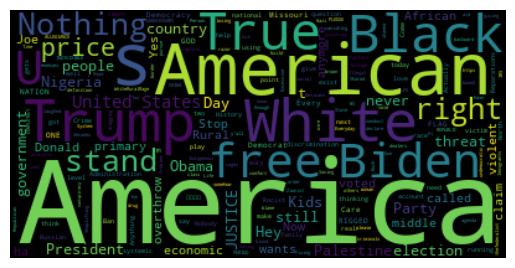

In [23]:
consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
import seaborn as sns

In [25]:
df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,14,14,14,14
neutral,14,14,14,14
positive,26,26,26,26


<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

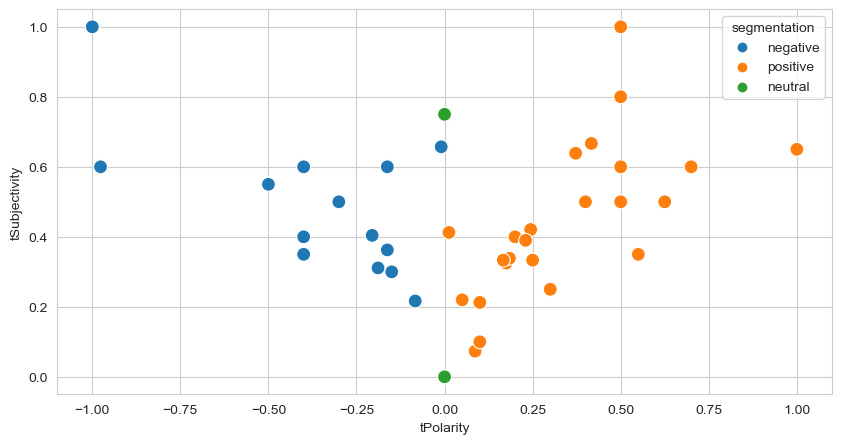

In [26]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')


<Axes: xlabel='segmentation', ylabel='count'>

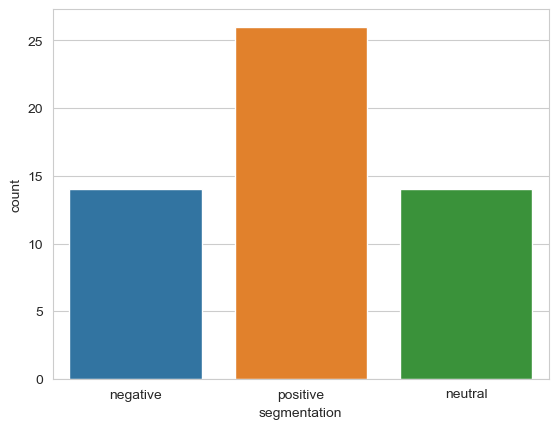

In [27]:
sns.countplot(data=df,x='segmentation')

In [28]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'response': ['Positive', 'Negative', 'Neutral'], 'percentage':[positive, negative, neutral]}
pd.DataFrame(response)

,response,percentage
0,Positive,48.1
1,Negative,25.9
2,Neutral,25.9
